In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.svm import SVC  # Import Support Vector Classifier from scikit-learn
from ISLP.svm import plot as plot_svm  # Import SVM plotting function from ISLP
from sklearn.metrics import RocCurveDisplay
import warnings
warnings.filterwarnings("ignore")

Question 1

In [2]:
Hitters = load_data('Hitters')
Hitters = Hitters.dropna()
X = Hitters[['CHits', 'CWalks']]
Hitters['HighSalary'] = (Hitters['Salary'] > Hitters['Salary'].median()).astype(int)
y=Hitters['HighSalary']

SVM_Linear1 = SVC(kernel='linear', C=0.1, max_iter=1000)
SVM_Linear1.fit(X, y)



,C,0.1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [3]:
SVM_Linear100 = SVC(kernel='linear', C=100, max_iter=1000)
SVM_Linear100.fit(X, y)


,C,100
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [4]:
print("Number of support vectors of model c=0.1:", len(SVM_Linear1.support_))
print("Number of support vectors of model c=100:", len(SVM_Linear100.support_))

Number of support vectors of model c=0.1: 35
Number of support vectors of model c=100: 19


Text(0, 0.5, 'High Salary')

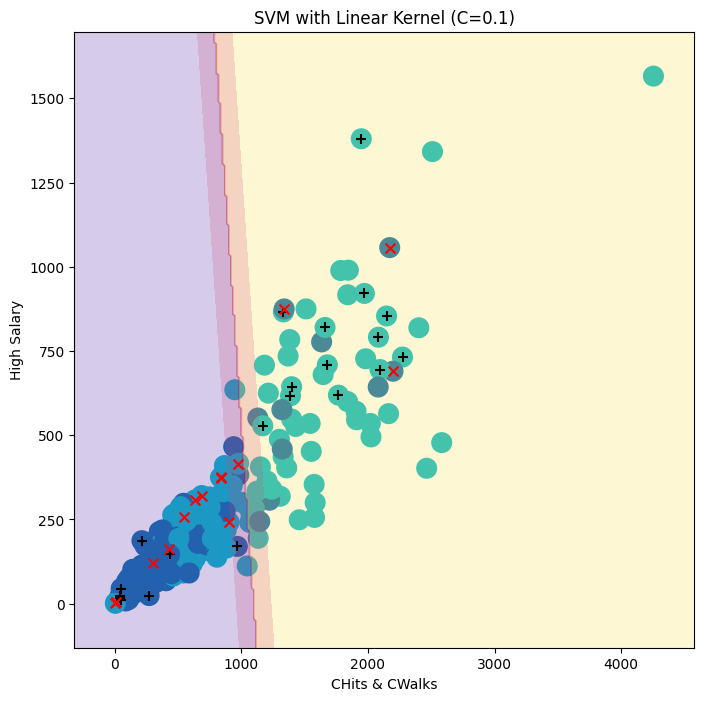

In [5]:
# Reset index to ensure continuous indexing from 0
X_reset = X.reset_index(drop=True)
y_reset = y.reset_index(drop=True)

fig, ax = subplots(figsize=(8,8)) 
plot_svm(X_reset, 
         y_reset,
         SVM_Linear1, 
         ax=ax)
ax.set_title('SVM with Linear Kernel (C=0.1)')
ax.set_xlabel("CHits & CWalks")
ax.set_ylabel("High Salary")


Text(0, 0.5, 'High Salary')

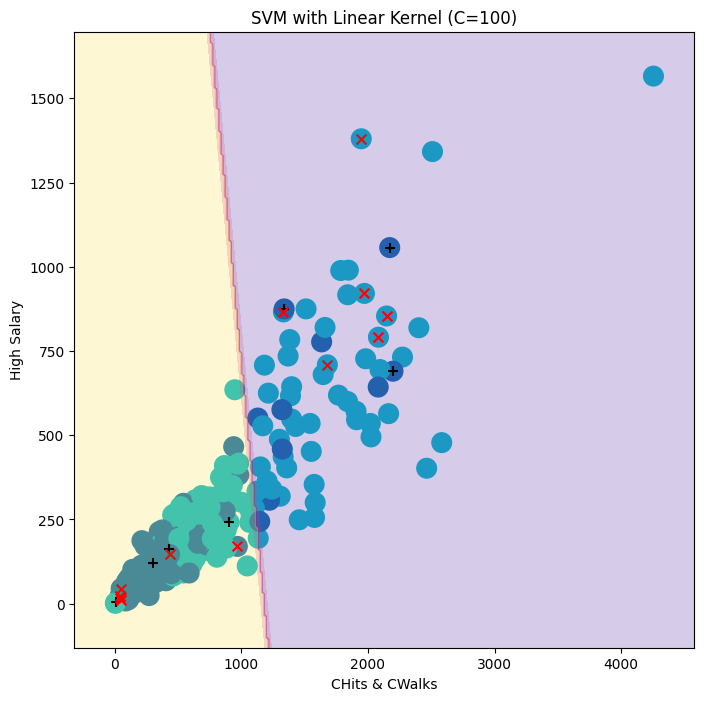

In [6]:
fig, ax = subplots(figsize=(8,8)) 
plot_svm(X_reset, 
         y_reset,
         SVM_Linear100, 
         ax=ax)
ax.set_title('SVM with Linear Kernel (C=100)')
ax.set_xlabel("CHits & CWalks")
ax.set_ylabel("High Salary")

What the c parameter does in SVM is control the trade-off between achieving a low training error and a low testing error, which is also known as the bias-variance trade-off. A small c makes the decision surface smooth, which including more support vectors using a soft margin. While a large c aims to classify all training examples correctly, which is more flexible.

Question 2

In [8]:
kfold = skm.KFold(5,  # Create 5-fold cross-validation splitter
                  random_state=42,  # Set random seed for reproducibility
                  shuffle=True)  # Shuffle data before splitting into folds
grid = skm.GridSearchCV(SVM_Linear1,  # Perform grid search on the SVM model
                        {'C':[0.01,0.1,1,10,100]},  # Try these values for cost parameter C
                        refit=True,  # Refit the best model on the full dataset
                        cv=kfold,  # Use 5-fold cross-validation
                        scoring='accuracy')

In [9]:
grid.fit(X, y)  # Fit grid search on the data to find best C value
grid.best_params_  # Display the best parameter values found


{'C': 0.01}

In [12]:
# Report Grid Search Results
print("Grid Search Results:")
print("=" * 50)

# Best C value and best CV accuracy
print(f"Best C value: {grid.best_params_['C']}")
print(f"Best CV accuracy: {grid.best_score_:.4f}")
print()

# All mean CV scores for each C value
print("All Mean CV Scores:")
print("-" * 30)
C_values = [0.01, 0.1, 1, 10, 100]
mean_scores = grid.cv_results_['mean_test_score']

for i, (C, score) in enumerate(zip(C_values, mean_scores)):
    if C == grid.best_params_['C']:
        print(f"C = {C:5.2f}: {score:.4f} ← Best")
    else:
        print(f"C = {C:5.2f}: {score:.4f}")



Grid Search Results:
Best C value: 0.01
Best CV accuracy: 0.6352

All Mean CV Scores:
------------------------------
C =  0.01: 0.6352 ← Best
C =  0.10: 0.4072
C =  1.00: 0.5222
C = 10.00: 0.5222
C = 100.00: 0.5222


Text(0.02, 0.98, 'Best C: 0.01\nBest CV Accuracy: 63.5%')

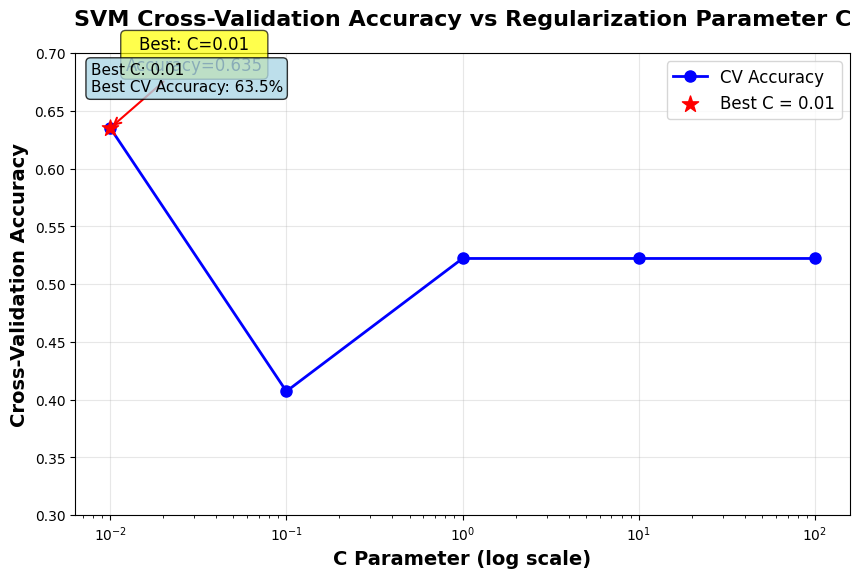

In [17]:
# Create line plot of CV accuracy vs C values
fig, ax = subplots(figsize=(10, 6))

# Extract data for plotting
C_values = [0.01, 0.1, 1, 10, 100]
mean_scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']

# Create line plot with error bars
ax.plot(C_values, mean_scores, 
        marker='o', linestyle='-', linewidth=2, markersize=8,
        color='blue', label='CV Accuracy')

# Mark the best C value
best_C = grid.best_params_['C']
best_score = grid.best_score_
ax.scatter(best_C, best_score, color='red', s=150, marker='*', 
          zorder=5, label=f'Best C = {best_C}')

# Add annotation for best point
ax.annotate(f'Best: C={best_C}\nAccuracy={best_score:.3f}', 
           xy=(best_C, best_score), xytext=(best_C*3, best_score+0.05),
           arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
           fontsize=12, ha='center', bbox=dict(boxstyle="round,pad=0.3", 
           facecolor="yellow", alpha=0.7))

# Set log scale for x-axis
ax.set_xscale('log')

# Customize the plot
ax.set_xlabel('C Parameter (log scale)', fontsize=14, fontweight='bold')
ax.set_ylabel('Cross-Validation Accuracy', fontsize=14, fontweight='bold')
ax.set_title('SVM Cross-Validation Accuracy vs Regularization Parameter C', 
            fontsize=16, fontweight='bold', pad=20)

# Add grid and legend
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

# Set y-axis limits for better visualization
ax.set_ylim(0.3, 0.7)

# Add text box with summary
textstr = f'Best C: {best_C}\nBest CV Accuracy: {best_score:.1%}'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Display the plot

Question 3

In [18]:
np.random.seed(42)
X2 = np.random.randn(200, 2)
X2[:100] += 2
X2[100:150] -= 2
y2 = np.array([1]*150 + [2]*50)

In [19]:
X2_train, X2_test, y2_train, y2_test = skm.train_test_split(X2, y2, test_size=0.5, random_state=42)

In [23]:
from sklearn.metrics import accuracy_score

svm_rbf1 = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf1.fit(X2_train, y2_train)
svm_rbf1_pred = svm_rbf1.predict(X2_test)
svm_rbf1_accuracy = accuracy_score(y2_test, svm_rbf1_pred)
print(f"SVM RBF (gamma=1, C=1) Test Accuracy: {svm_rbf1_accuracy:.4f}")

SVM RBF (gamma=1, C=1) Test Accuracy: 0.8700


Text(0.5, 1.0, 'SVM with RBF Kernel (gamma=1, C=1)')

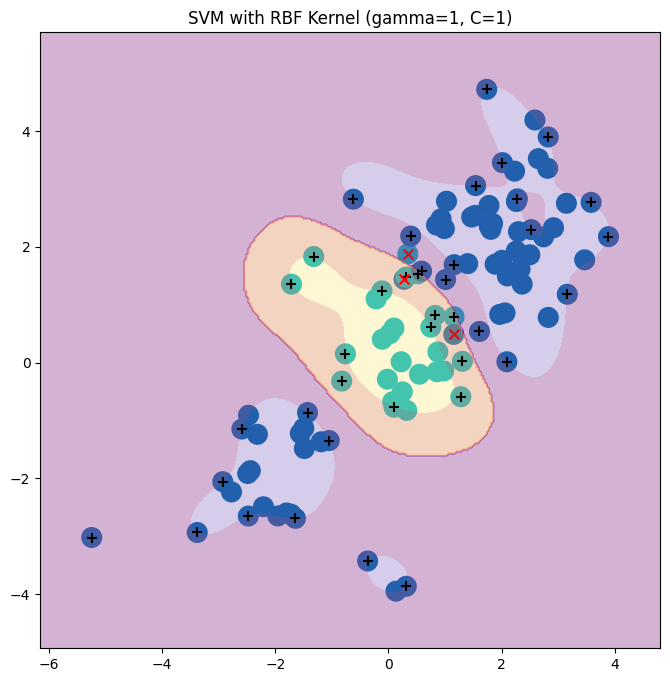

In [24]:
fig, ax = subplots(figsize=(8,8))  # Create a figure and axis for plotting
plot_svm(X2_train,  # Plot SVM decision boundary using training features
         y2_train,  # Use training labels for coloring
         svm_rbf1,  # Plot the fitted RBF SVM model
         ax=ax)
ax.set_title('SVM with RBF Kernel (gamma=1, C=1)')

In [26]:
svm_rbf01 = SVC(kernel="rbf", gamma=0.1, C=1)
svm_rbf01.fit(X2_train, y2_train)
svm_rbf10 = SVC(kernel="rbf", gamma=10, C=1)
svm_rbf10.fit(X2_train, y2_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,10
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [25]:
roc_curve = RocCurveDisplay.from_estimator